# Install

In [1]:
# pip install patchify

In [2]:
# pip install Keras-Applications

In [3]:
# pip install segmentation-models-3D

In [4]:
# pip install scikit-image

In [22]:
# pip install opencv-python

In [5]:
import tensorflow as tf
import keras 
print(tf.__version__)
print(keras.__version__)

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2.8.0
2.8.0


2022-04-10 14:41:34.669709: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-10 14:41:34.708932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:34.715146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:34.715352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3437541099425215371
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 32496353280
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7273480240194743595
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:03:00.0, compute capability: 7.0"
 xla_global_id: 416903419]

In [6]:
#Make sure the GPU is available. 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-04-10 14:41:35.328625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:35.328871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:35.329038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:35.329245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:35.329412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [7]:
tf.test.gpu_device_name()

2022-04-10 14:41:35.354405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


'/device:GPU:0'

2022-04-10 14:41:35.354622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:35.354789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:35.355002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:35.355174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:41:35.355310: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 3

# STEP 1: Data Preparation
- Load dataset and slice padding
- patchify

In [23]:
import numpy as np
from skimage import io
import os

import random
from scipy import ndimage
import cv2

## Set cases

In [9]:
# Full Train 32 cases: train 24, val 8
train_cases = ['Normal_03.tif','Normal_04.tif','Normal_05.tif','Normal_06.tif','Normal_07.tif','Normal_08.tif',
               'Mild_03.tif','Mild_04.tif','Mild_05.tif','Mild_06.tif','Mild_07.tif','Mild_08.tif',
               'Moderate_03.tif','Moderate_04.tif','Moderate_05.tif','Moderate_06.tif','Moderate_07.tif','Moderate_08.tif',
               'Severe_02.tif','Severe_03.tif','Severe_04.tif','Severe_05.tif','Severe_06.tif','Severe_08.tif']

# aug_cases = ['Normal_03.tif','Normal_07.tif',
#              'Mild_03.tif','Mild_04.tif',
#              'Moderate_03.tif','Moderate_04.tif',
#              'Severe_02.tif','Severe_04.tif']

#aug แบบ2 : แย่กว่าแบบ 1
# aug_cases = ['Normal_03.tif','Normal_07.tif',
#              'Mild_03.tif','Mild_08.tif',
#              'Moderate_03.tif','Moderate_04.tif',
#              'Severe_02.tif','Severe_04.tif']

#aug แบบ3
# aug_cases = ['Normal_07.tif',
#              'Mild_08.tif',
#              'Moderate_04.tif',
#              'Severe_04.tif']

val_cases = ['Normal_01.tif','Normal_02.tif',
             'Mild_01.tif','Mild_02.tif',
             'Moderate_01.tif','Moderate_02.tif',
             'Severe_01.tif','Severe_07.tif']

print('Train: ',len(train_cases))
# print('Augment: ',len(aug_cases))
print('Val:   ',len(val_cases))
print('Total: ',(len(train_cases)+len(val_cases)))
print(len(val_cases)/(len(train_cases)+len(val_cases)))

Train:  24
Val:    8
Total:  32
0.25


In [10]:
#Padding function
def padding(image, slice_vol):
    slice_, row, col= image.shape #(0,1,2) ตรงกับ (119,256,256)
  
    #เพิ่ม slice เข้าไป
    if slice_vol > slice_: 
        slice_padding = slice_vol - slice_
        padding_array = np.zeros((slice_padding, row, col))
        image_paded = np.concatenate((image,padding_array), axis=0)
    #เ  อา slice ออก
    else: 
        image_paded = image[:slice_vol,:,:]
    return np.asarray(np.array(image_paded), dtype="uint8" )

#Load data for loop function
def load_data(list_case, drive_path,img_path,mask_path):
    image = np.array([])
    mask = np.array([])
 
    for case in list_case:
        img = io.imread(drive_path+img_path+'/'+case)
        mask_ = io.imread(drive_path+mask_path+'/'+case)
        print('image: '+case+' slice: ',img.shape[0])
        print('mask:'+case+' slice: ',mask_.shape[0])
        if image.shape[0] == 0:
            if img.shape[0] <= 128:
                image = padding(img, 128)
                mask = padding(mask_, 128)
            elif ((img.shape[0] > 128) and (img.shape[0] <= 175)):
                # set center range 
                start_lung = int((img.shape[0]/2)-64)
                end_lung = int((img.shape[0]/2)+64)
                image = np.asarray(np.array(img[start_lung:end_lung,:,:]), dtype="uint8" )
                mask = np.asarray(np.array(mask_[start_lung:end_lung,:,:]), dtype="uint8" )
            else:
                if img.shape[0] <= 256:
                    # skipping slice
                    image = padding(img[::2,:,:], 128)
                    mask = padding(mask_[::2,:,:], 128)
                else:
                    print('CT slice volume is to large')
          
        else:
            if img.shape[0] <= 128:
                image = np.concatenate((image, padding(img, 128)), axis=0)
                mask = np.concatenate((mask, padding(mask_, 128)), axis=0)
            elif ((img.shape[0] > 128) and (img.shape[0] <= 175)):
                # set center range 
                start_lung = int((img.shape[0]/2)-64)
                end_lung = int((img.shape[0]/2)+64)
                img_arr = np.asarray(np.array(img[start_lung:end_lung,:,:]), dtype="uint8" )
                mask_arr = np.asarray(np.array(mask_[start_lung:end_lung,:,:]), dtype="uint8" )
                image = np.concatenate((image, img_arr), axis=0)
                mask = np.concatenate((mask, mask_arr), axis=0)
            else:
                if img.shape[0] <= 256:
                    image = np.concatenate((image, padding(img[::2,:,:], 128)), axis=0)
                    mask = np.concatenate((mask, padding(mask_[::2,:,:], 128)), axis=0)
                else:
                    print('CT slice volume is to large')
   
    print(image.shape)
    print(mask.shape)
    return image, mask

#Load data for loop function and data augmentation
def rotate_img(volume, angle):
    augmented_volume = np.array([])
    for i in range(volume.shape[0]):
        if augmented_volume.shape[0] == 0:
            augmented_volume = ndimage.rotate(volume[i], angle, reshape=False) #scipy_rotate(volume[i], angle)
            augmented_volume = np.expand_dims(augmented_volume, axis=0)
            # print('shape:', augmented_volume.shape)
        else:
            img_aug = ndimage.rotate(volume[i], angle, reshape=False) #scipy_rotate(volume[i], angle)
            img_aug = np.expand_dims(img_aug, axis=0)
            augmented_volume = np.concatenate((augmented_volume, img_aug), axis=0)
            # print('shape:', augmented_volume.shape)
    return augmented_volume

def rotate_mask(mask_volume, angle):
    augmented_volume = np.array([])
    for i in range(mask_volume.shape[0]):
        if augmented_volume.shape[0] == 0:
            augmented_volume = ndimage.rotate(mask_volume[i], angle, order=0,reshape=False) #scipy_rotate(volume[i], angle)
            augmented_volume = np.expand_dims(augmented_volume, axis=0)
            # print('shape:', augmented_volume.shape)
        else:
            img_aug = ndimage.rotate(mask_volume[i], angle, order=0,reshape=False) #scipy_rotate(volume[i], angle)
            img_aug = np.expand_dims(img_aug, axis=0)
            augmented_volume = np.concatenate((augmented_volume, img_aug), axis=0)
            # print('shape:', augmented_volume.shape)
    return augmented_volume

def load_data_aug(list_case, drive_path,img_path,mask_path):
    image = np.array([])
    mask = np.array([])
    random.seed(20)
    # define some rotation angles
    angles = [-15, 15]
 
    for case in list_case:
        img = io.imread(drive_path+img_path+'/'+case)
        mask_ = io.imread(drive_path+mask_path+'/'+case)
        print('image: '+case+' slice: ',img.shape[0])
        print('mask:'+case+' slice: ',mask_.shape[0])

        # pick angles at random
        angle = random.choice(angles)
        print(case+' angle: ',angle)

        if image.shape[0] == 0:
            # augmentation
            img = rotate_img(img, angle)
            mask_ = rotate_mask(mask_, angle)

            # slice volumn adjust
            if img.shape[0] <= 128:
                image = padding(img, 128)
                mask = padding(mask_, 128)
            elif ((img.shape[0] > 128) and (img.shape[0] <= 175)):
                # set center range 
                start_lung = int((img.shape[0]/2)-64)
                end_lung = int((img.shape[0]/2)+64)
                image = np.asarray(np.array(img[start_lung:end_lung,:,:]), dtype="uint8" )
                mask = np.asarray(np.array(mask_[start_lung:end_lung,:,:]), dtype="uint8" )
            else:
                if img.shape[0] <= 256:
                    # skipping slice
                    image = padding(img[::2,:,:], 128)
                    mask = padding(mask_[::2,:,:], 128)
                else:
                    print('CT slice volume is to large')
          
        else:
            # augmentation
            img = rotate_img(img, angle)
            mask_ = rotate_mask(mask_, angle)

            # slice volumn adjust
            if img.shape[0] <= 128:
                image = np.concatenate((image, padding(img, 128)), axis=0)
                mask = np.concatenate((mask, padding(mask_, 128)), axis=0)
            elif ((img.shape[0] > 128) and (img.shape[0] <= 175)):
                # set center range 
                start_lung = int((img.shape[0]/2)-64)
                end_lung = int((img.shape[0]/2)+64)
                img_arr = np.asarray(np.array(img[start_lung:end_lung,:,:]), dtype="uint8" )
                mask_arr = np.asarray(np.array(mask_[start_lung:end_lung,:,:]), dtype="uint8" )
                image = np.concatenate((image, img_arr), axis=0)
                mask = np.concatenate((mask, mask_arr), axis=0)
            else:
                if img.shape[0] <= 256:
                    image = np.concatenate((image, padding(img[::2,:,:], 128)), axis=0)
                    mask = np.concatenate((mask, padding(mask_[::2,:,:], 128)), axis=0)
                else:
                    print('CT slice volume is to large')
   
    print(image.shape)
    print(mask.shape)
    return image, mask

def load_dataStartEndLung(list_case, drive_path,img_path,mask_path):
    image = np.array([])
    mask = np.array([])
 
    for case in list_case:
        img = io.imread(drive_path+img_path+'/'+case)
        mask_ = io.imread(drive_path+mask_path+'/'+case)
        print('image: '+case+' slice: ',img.shape[0])
        print('mask:'+case+' slice: ',mask_.shape[0])
        if image.shape[0] == 0:
            if img.shape[0] <= 128:
                image = padding(img, 128)
                mask = padding(mask_, 128)
            else:
                if img.shape[0] <= 256:
                    # skipping slice
                    image = padding(img[::2,:,:], 128)
                    mask = padding(mask_[::2,:,:], 128)
                else:
                    print('CT slice volume is to large')
          
        else:
            if img.shape[0] <= 128:
                image = np.concatenate((image, padding(img, 128)), axis=0)
                mask = np.concatenate((mask, padding(mask_, 128)), axis=0)
            else:
                if img.shape[0] <= 256:
                    image = np.concatenate((image, padding(img[::2,:,:], 128)), axis=0)
                    mask = np.concatenate((mask, padding(mask_[::2,:,:], 128)), axis=0)
                else:
                    print('CT slice volume is to large')
   
    print(image.shape)
    print(mask.shape)
    return image, mask

In [11]:
# drive_path =  '/tf/Project/dataset/ICE_imageconvert/Version1_1/train/images_crop/'
# drive_path_ =  '/tf/Project/dataset/ICE_imageconvert/Version1_1/train/lesions/' 

In [12]:
# Tiff_folder = 'Tif_256x256/'
# Tiff_folder = 'Tif_512x512/'
# Tiff_folder ='Tif_256x256_StartEnd/'
# img_path_c1 = 'images'
img_path_c1 = 'images_crop'
# img_path_c2 = 'images_createCLAHE'
# img_path_c3 = 'images_equalizeHist'
# mask_path = 'masks'
mask_path = 'lesions'

# path_ = '/tf/Project/LungLobe/'
# drive_path = path_+Tiff_folder


drive_lesion_path =  '/tf/Project/dataset/ICE_imageconvert/Version1_1/train/'

## Train

In [30]:
image, mask = load_data(train_cases, drive_lesion_path,img_path_c1, mask_path)
# cre, mask = load_data(train_cases, drive_path,img_path_c2, mask_path)
# equ, mask = load_data(train_cases, drive_path,img_path_c3, mask_path)

# image, mask = load_dataStartEndLung(train_cases, drive_path,img_path,mask_path)

image: Normal_03.tif slice:  124
mask:Normal_03.tif slice:  124
image: Normal_04.tif slice:  111
mask:Normal_04.tif slice:  111
image: Normal_05.tif slice:  112
mask:Normal_05.tif slice:  112
image: Normal_06.tif slice:  106
mask:Normal_06.tif slice:  106
image: Normal_07.tif slice:  175
mask:Normal_07.tif slice:  175
image: Normal_08.tif slice:  126
mask:Normal_08.tif slice:  126
image: Mild_03.tif slice:  120
mask:Mild_03.tif slice:  120
image: Mild_04.tif slice:  130
mask:Mild_04.tif slice:  130
image: Mild_05.tif slice:  116
mask:Mild_05.tif slice:  116
image: Mild_06.tif slice:  114
mask:Mild_06.tif slice:  114
image: Mild_07.tif slice:  118
mask:Mild_07.tif slice:  118
image: Mild_08.tif slice:  98
mask:Mild_08.tif slice:  98
image: Moderate_03.tif slice:  104
mask:Moderate_03.tif slice:  104
image: Moderate_04.tif slice:  108
mask:Moderate_04.tif slice:  108
image: Moderate_05.tif slice:  124
mask:Moderate_05.tif slice:  124
image: Moderate_06.tif slice:  109
mask:Moderate_06.ti

In [ ]:
# Load data augmentation
# image_aug, mask_aug = load_data_aug(aug_cases, drive_path,img_path,mask_path)

In [ ]:
# print(np.unique(mask_aug))

## Validation

In [15]:
test_img, test_mask = load_data(val_cases, drive_lesion_path,img_path_c1,mask_path)
# test_cre, test_mask = load_data(val_cases, drive_path,img_path_c2,mask_path)
# test_equ, test_mask = load_data(val_cases, drive_path,img_path_c3,mask_path)

# test_img, test_mask = load_dataStartEndLung(val_cases, drive_path,img_path,mask_path)

image: Normal_01.tif slice:  112
mask:Normal_01.tif slice:  112
image: Normal_02.tif slice:  119
mask:Normal_02.tif slice:  119
image: Mild_01.tif slice:  119
mask:Mild_01.tif slice:  119
image: Mild_02.tif slice:  92
mask:Mild_02.tif slice:  92
image: Moderate_01.tif slice:  112
mask:Moderate_01.tif slice:  112
image: Moderate_02.tif slice:  138
mask:Moderate_02.tif slice:  138
image: Severe_01.tif slice:  107
mask:Severe_01.tif slice:  107
image: Severe_07.tif slice:  100
mask:Severe_07.tif slice:  100
(1024, 256, 256)
(1024, 256, 256)


### Value check

In [16]:
print(np.unique(image))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [17]:
print(np.unique(mask))

[0 1]


In [ ]:
# change image value to [0,1]
# image = image/255
# test_img = test_img/255

# cre = cre/255
# test_cre = test_cre/255

# equ = equ/255
# test_equ = test_equ/255


In [ ]:
# print(np.unique(test_cre))

In [ ]:
# print(np.unique(mask))

## contrast 

In [18]:
def contrast_CLAHE(image, ts):
    clahe = cv2.createCLAHE(clipLimit=ts, tileGridSize=(8,8))
    img_list = []
    for i in range(image.shape[0]):
        cl_img =  clahe.apply(image[i,:,:])
        img_list.append(cl_img)
    new_img = np.asarray(np.array(img_list), dtype="uint8" )
    return(new_img)

def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

def contrast_Manual(image, brightness, contrast):
    img_list = []
    for i in range(image.shape[0]):
        contrast_img = apply_brightness_contrast(image[i,:,:], brightness, contrast)
        img_list.append(contrast_img)
    new_img = np.asarray(np.array(img_list), dtype="uint8" )
    return(new_img)

In [24]:
#contrast_CLAHE
image  = contrast_CLAHE(image, 3)
test_img = contrast_CLAHE(test_img, 3)
print(image.shape)
print(test_img.shape)

(3072, 256, 256)
(1024, 256, 256)


In [25]:
#contrast_Manual
image  = contrast_Manual(image, 32, 0)
test_img = contrast_Manual(test_img, 32, 0)
print(image.shape)
print(test_img.shape)

(3072, 256, 256)
(1024, 256, 256)


### Slice visualization

slice plot function

In [26]:
from matplotlib import pyplot as plt

In [27]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    # data = np.rot90(np.array(data))
    # data = np.transpose(data)
    data = np.reshape(np.array(data), (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 20.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

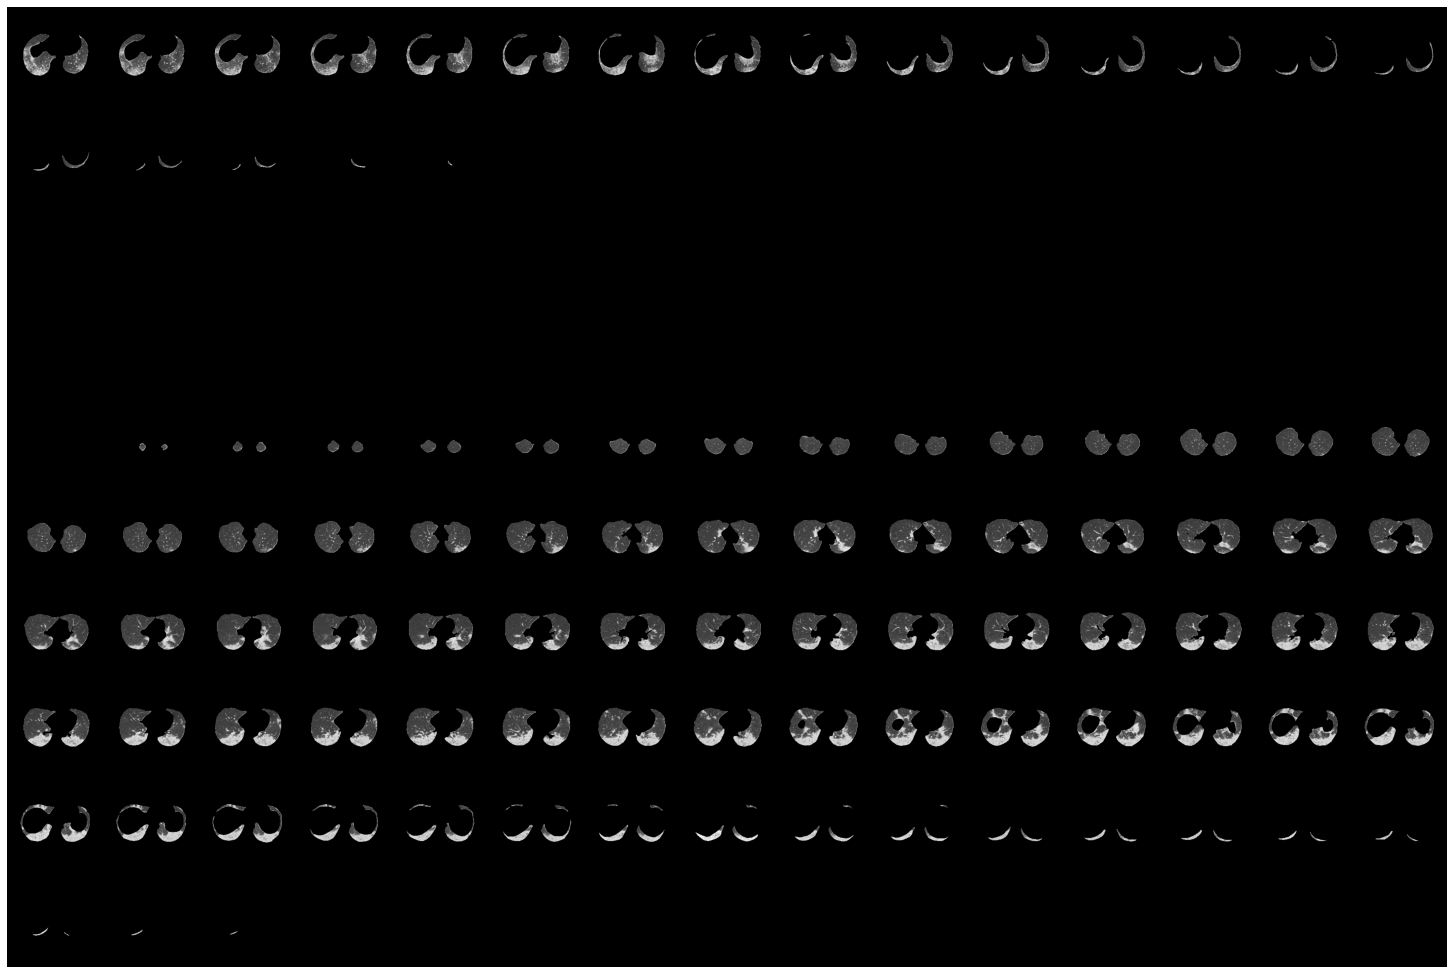

In [37]:
#Visualize raw images
plot_slices(10, 15, 256, 256, image[2000:2150, :, :]) #image, cre

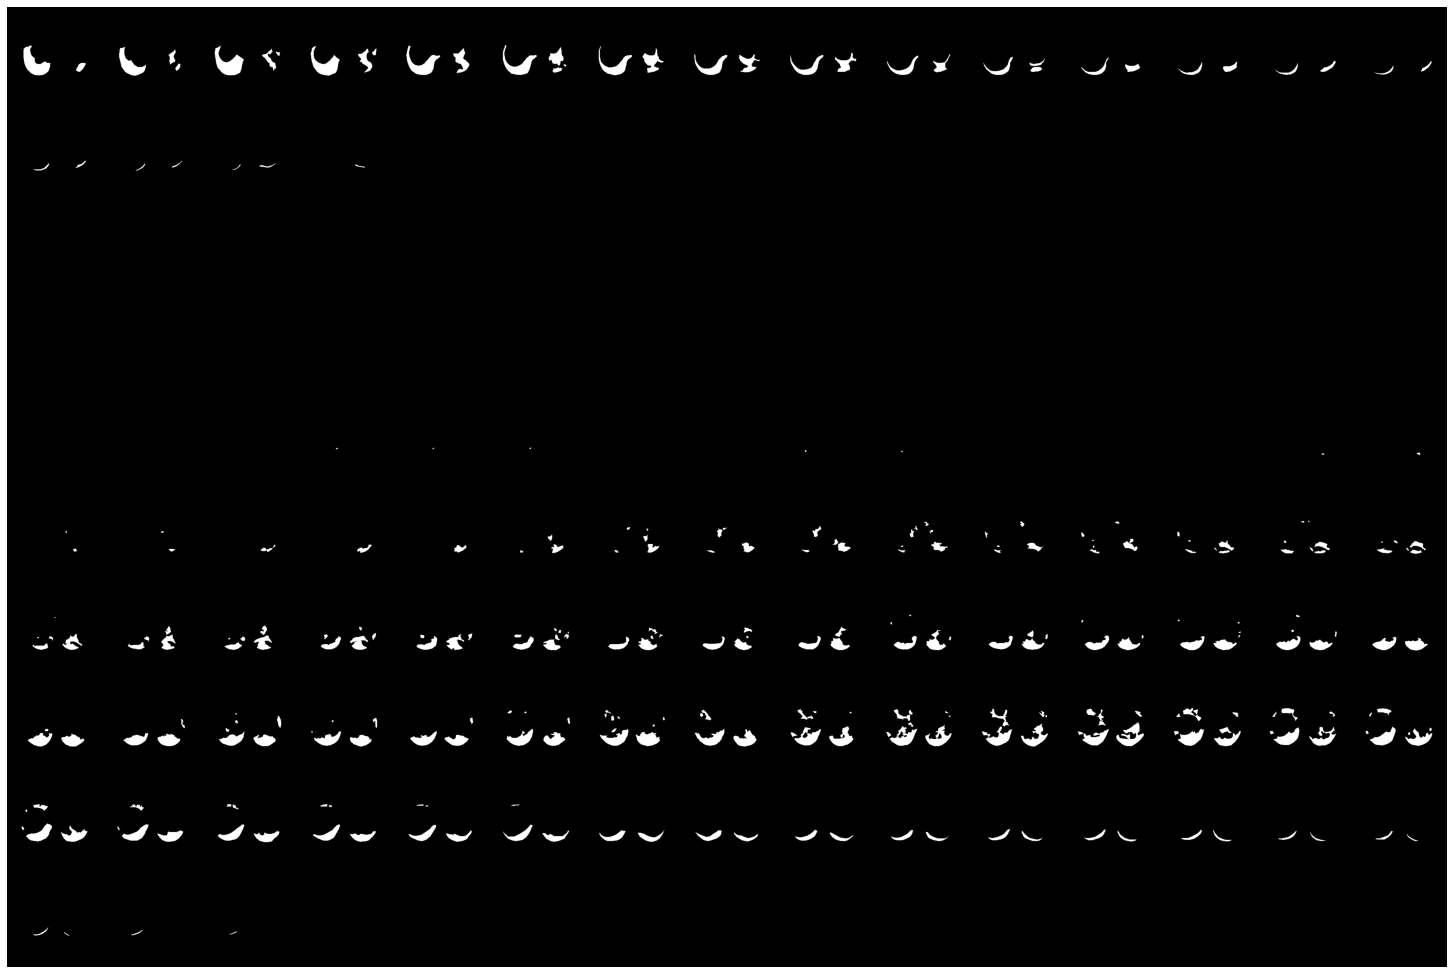

In [39]:
# mask of the CT scan.
plot_slices(10, 15, 256, 256, mask[2000:2150, :, :])

### Patchify

In [40]:
from patchify import patchify, unpatchify

In [41]:
print('Train image:',image.shape)
# print('Train image:',cre.shape)
# print('Train image:',equ.shape)
print('Train mask:',mask.shape)
# print('Augmented image:',image_aug.shape)
# print('Augmented mask:',mask_aug.shape)

# image = np.concatenate((image, image_aug), axis=0)
# mask = np.concatenate((mask, mask_aug), axis=0)
# print(image.shape)
# print(mask.shape)

Train image: (3072, 256, 256)
Train mask: (3072, 256, 256)


In [42]:
#z,x,y for model (128, 256, 256) Densenet121, resnet18
slice_volumn = 128 # set จำนวนสไลด์ที่จะใช้เทรน
'''
Train
'''
img_patches = patchify(image, (slice_volumn, 256, 256), step=slice_volumn)
# img_patches = patchify(cre, (slice_volumn, 256, 256), step=slice_volumn)
# img_patches = patchify(equ, (slice_volumn, 256, 256), step=slice_volumn)
mask_patches = patchify(mask, (slice_volumn, 256, 256), step=slice_volumn)

'''
Test
'''
test_img_patches = patchify(test_img, (slice_volumn, 256, 256), step=slice_volumn)
# test_img_patches = patchify(test_cre, (slice_volumn, 256, 256), step=slice_volumn)
# test_img_patches = patchify(test_equ, (slice_volumn, 256, 256), step=slice_volumn)
test_mask_patches = patchify(test_mask, (slice_volumn, 256, 256), step=slice_volumn)

print(img_patches.shape)
print(mask_patches.shape)
print(test_img_patches.shape)
print(test_mask_patches.shape)

(24, 1, 1, 128, 256, 256)
(24, 1, 1, 128, 256, 256)
(8, 1, 1, 128, 256, 256)
(8, 1, 1, 128, 256, 256)


In [43]:
input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

input_test_img = np.reshape(test_img_patches, (-1, test_img_patches.shape[3], test_img_patches.shape[4], test_img_patches.shape[5]))
input_test_mask = np.reshape(test_mask_patches, (-1, test_mask_patches.shape[3], test_mask_patches.shape[4], test_mask_patches.shape[5]))

print(input_img.shape)  # n_patches, x, y, z
print(input_test_img.shape)

(24, 128, 256, 256)
(8, 128, 256, 256)


In [44]:
# Channels
# train_img = np.stack((input_img,input_img_CLAHE,input_img_equalizeHist), axis=-1)
train_img = np.stack((input_img,)*3, axis=-1)
train_mask = np.expand_dims(input_mask, axis=4)

# img_test = np.stack((input_test_img,input_test_img_CLAHE,input_test_img_equalizeHist), axis=-1)
img_test = np.stack((input_test_img,)*3, axis=-1)
mask_test = np.expand_dims(input_test_mask, axis=4)

print(train_img.shape)
print(train_mask.shape)
print(img_test.shape)
print(mask_test.shape)

(24, 128, 256, 256, 3)
(24, 128, 256, 256, 1)
(8, 128, 256, 256, 3)
(8, 128, 256, 256, 1)


to_categorical

In [45]:
from tensorflow.keras.utils import to_categorical

n_classes = 2

y_train = to_categorical(train_mask, num_classes=n_classes)
y_test = to_categorical(mask_test, num_classes=n_classes)
print(y_train.shape)
print(y_test.shape)

(24, 128, 256, 256, 2)
(8, 128, 256, 256, 2)


In [46]:
X_train = train_img
X_test = img_test
# y_train = train_mask_cat
# y_test = test_mask_cat

# raw image
print(X_train.shape)
print(X_test.shape)

# mask
print(y_train.shape)
print(y_test.shape)

(24, 128, 256, 256, 3)
(8, 128, 256, 256, 3)
(24, 128, 256, 256, 2)
(8, 128, 256, 256, 2)


# STEP 2: Model

### 3Dunet-Densenet121, 3DFPN

In [47]:
from tensorflow import keras
import segmentation_models_3D as sm
# from segmentation_models.losses import CategoricalCELoss

encoder_weights = 'imagenet'

#Try densenet121, densenet169, densenet201 Total params: 22ล้าน
# resnet18, resnet34, resnet50, resnet101, resnet152
#inceptionv3, efficientnetb0
BACKBONE = 'densenet169'
activation = 'sigmoid' #sigmoid, softmax
patch_size = 256 # 128, 224, 256, 512
volumn_size = slice_volumn # 32, 64, 128
n_classes = 2
channels=3

LR = 0.0001
optim = keras.optimizers.Adam(LR)

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
preprocess_input = sm.get_preprocessing(BACKBONE)

Segmentation Models: using `tf.keras` framework.


preprocess_input

In [48]:
X_train_prep = preprocess_input(X_train)
X_test_prep = preprocess_input(X_test)

Build model

In [49]:
model = sm.Unet(BACKBONE, classes=n_classes, 
                input_shape=(volumn_size, patch_size, patch_size, channels), 
                encoder_weights=encoder_weights,
                #encoder_freeze = True, # set เพื่อทำการ Tuning
                activation=activation,
                dropout=0.2)
# model = sm.FPN(BACKBONE, classes=n_classes, 
#                input_shape=(volumn_size, patch_size, patch_size, channels), 
#                encoder_weights=encoder_weights,
#                activation=activation,
#                pyramid_dropout=0.2)

2022-04-10 14:49:21.522585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:49:21.522877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:49:21.523058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:49:21.523477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 14:49:21.523674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

Add regularizer

In [50]:
import tensorflow as tf
from segmentation_models_3D.utils import set_regularization
'''
    set_regularization(model,
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    beta_regularizer=None,
    gamma_regularizer=None,
    **kwargs)
'''

# l2=0.01 ioU=0.83
# l2=0.1
regularizer = tf.keras.regularizers.L2(l2=0.01)
# regularizer = tf.keras.regularizers.L1(l1=0.01)
set_regularization(model, kernel_regularizer = regularizer,
                   bias_regularizer = regularizer)
# set_regularization(model, activity_regularizer = regularizer) #ใช้ไม่ได้นะเวลา train ละจะ error

compile

In [51]:
# aliases
# jaccard_loss = JaccardLoss()
# dice_loss = DiceLoss()

# binary_focal_loss = BinaryFocalLoss()
# categorical_focal_loss = CategoricalFocalLoss()
# binary_crossentropy = BinaryCELoss()
# categorical_crossentropy = CategoricalCELoss()

# loss combinations
# categorical_focal_dice_loss = categorical_focal_loss + dice_loss ตอนนี้ใช้อันนี้อยู่
# categorical_focal_jaccard_loss = categorical_focal_loss + jaccard_loss
# cce_dice_loss = categorical_crossentropy + dice_loss
# cce_jaccard_loss = categorical_crossentropy + jaccard_loss

In [52]:
# dice_loss = DiceLoss()
# categorical_focal_loss = CategoricalFocalLoss()
# categorical_crossentropy = CategoricalCELoss()
# categorical_focal_dice_loss = categorical_focal_loss + dice_loss ตอนนี้ใช้อันนี้อยู่
# cce_dice_loss = categorical_crossentropy + dice_loss

# total_loss = sm.losses.categorical_focal_dice_loss
total_loss = sm.losses.binary_focal_dice_loss
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 256, 2  0           []                               
                                56, 3)]                                                           
                                                                                                  
 zero_padding3d (ZeroPadding3D)  (None, 134, 262, 26  0          ['input_1[0][0]']                
                                2, 3)                                                             
                                                                                                  
 conv1/conv (Conv3D)            (None, 64, 128, 128  65856       ['zero_padding3d[0][0]']         
                                , 64)                                                         

Visualize Model Struture

In [53]:
# !pip install pydot
# !pip install graphviz

In [54]:
# from keras.utils.vis_utils import plot_model
# path_ = '/tf/Project/LungLobe/'
# Model_name = '3DUNet_densenet121_Model1'
# save_path_model_struture = path_+'LungModel/'+Model_name+'.png'

# plot_model(model, to_file=save_path_model_struture, show_shapes=True, show_layer_names=True)

Fit model Densenet121-3DUnet

In [55]:
# Densenet121-3DUnet, Densenet169-3DUnet #เทรนทุกสไลด์ Tiff_256x256
# class:6 : 1 background+ 5 lobe
# เทรน 200 Epochs โดยมี EarlyStopping
import time
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20) #20

path_ = '/tf/Project/LungLobe/'
Model_name = '3DUNetD169_Model1'
# save_path_ = path_+'LungModel/'+Model_name+'.h5'
save_path_ = path_+'LesionModel/'+Model_name+'.h5'
mc = ModelCheckpoint(save_path_, monitor='val_iou_score', mode='max', verbose=1, save_best_only=True)

start = time.time()
#-------------------------------------------
# train 24 val 8
history=model.fit(X_train_prep, y_train, batch_size=1, 
          epochs=200, verbose=1,
          validation_data=(X_test_prep, y_test),
          shuffle=True,
          callbacks=[es, mc])
#-------------------------------------------
end = time.time()
print('time process used>', str(datetime.timedelta(seconds=end - start)))

2022-04-10 14:49:29.446764: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2415919104 exceeds 10% of free system memory.
2022-04-10 14:49:31.552290: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1610612736 exceeds 10% of free system memory.
2022-04-10 14:49:32.968045: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2415919104 exceeds 10% of free system memory.
2022-04-10 14:49:34.419287: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1610612736 exceeds 10% of free system memory.


Epoch 1/200


2022-04-10 14:49:55.180266: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


24/24 [==============================] - ETA: 0s - loss: 0.7248 - iou_score: 0.3471 - f1-score: 0.4126
Epoch 1: val_iou_score improved from -inf to 0.13824, saving model to /tf/Project/LungLobe/LesionModel/3DUNetD169_Model1.h5
24/24 [==============================] - 154s 5s/step - loss: 0.7248 - iou_score: 0.3471 - f1-score: 0.4126 - val_loss: 0.9427 - val_iou_score: 0.1382 - val_f1-score: 0.2184
Epoch 2/200
24/24 [==============================] - ETA: 0s - loss: 0.6385 - iou_score: 0.5097 - f1-score: 0.5536
Epoch 2: val_iou_score improved from 0.13824 to 0.28668, saving model to /tf/Project/LungLobe/LesionModel/3DUNetD169_Model1.h5
24/24 [==============================] - 115s 5s/step - loss: 0.6385 - iou_score: 0.5097 - f1-score: 0.5536 - val_loss: 0.7742 - val_iou_score: 0.2867 - val_f1-score: 0.3675
Epoch 3/200
24/24 [==============================] - ETA: 0s - loss: 0.6081 - iou_score: 0.5410 - f1-score: 0.5793
Epoch 3: val_iou_score improved from 0.28668 to 0.48904, saving mode

save history

In [56]:
import pickle

# save_model_p = path_+'LungModel/'+'History_'+Model_name
save_model_p = path_+'LesionModel/'+'History_'+Model_name
with open(save_model_p, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)